In [ ]:
### CODE for getting cropped player images from a given input image, Don't run this code, 
# it is now longer neccessary just used for an example 

# Define the class ID or name for "player" (adjust based on your model's class names)
player_class_id = None
for cls_id, cls_name in model.names.items():
    if cls_name.lower() == "player":  # Adjust "player" to the exact name used in your model
        player_class_id = cls_id
        break
    
# Process the detected bounding boxes
for r in results:
    for i, box in enumerate(r.boxes):  # Access bounding boxes
        class_id = int(box.cls[0])  # Class ID for the detection
        if class_id == player_class_id:  # Only process "player" detections
            xyxy = box.xyxy[0].tolist()  # Get bounding box coordinates [x_min, y_min, x_max, y_max]
            x_min, y_min, x_max, y_max = map(int, xyxy)  # Convert to integers

            # Crop the bounding box from the original image
            cropped_image = input_image[y_min:y_max, x_min:x_max]

            # Save the cropped image
            cropped_image_path = os.path.join("team_selection", f"cropped_player_{i}.jpg")
            cv2.imwrite(cropped_image_path, cropped_image)

            print(f"Cropped player image saved at: {cropped_image_path}")

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [59]:
# read image and make sure it is RGB. 
image_path = "cropped_player_9.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

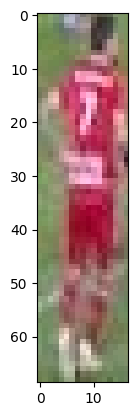

In [60]:
plt.imshow(image)
plt.show()

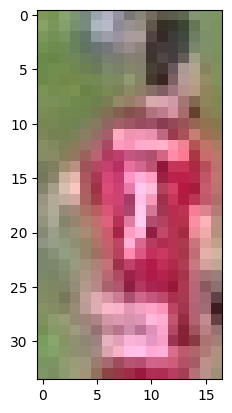

In [61]:
# get top half of image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

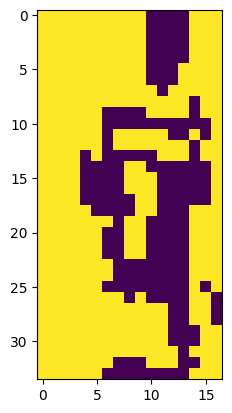

In [71]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [63]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [64]:
player_cluster = 1-non_player_cluster
print(player_cluster)


0


In [65]:
kmeans.cluster_centers_[player_cluster]

array([157.36312849,  64.83798883,  85.01117318])